# The Most Influential Factor Affecting Alcohol Boiling Point
Lee Yuan Zhe  
04/01/2022

## 1. Introduction

### 1.1 Motivation

The following modules will be used in this notebook. We'll introduce the module *sklearn* in a short while.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as mds
import sklearn.linear_model as lnm
import sklearn.preprocessing as ppc

The file titled *ROH.csv* contains information on more than a hundred simple alcohols. The information is compiled from https://webbook.nist.gov/chemistry/. Simple alcohols are alcohols with a single hydroxy group (-OH group), with no other functional groups. In particular, the file contains the boiling point of each alcohol, a property we will study in this notebook.

In [10]:
# Load the files ROH.csv as a data frame.
ROH = pd.read_csv('ROH.csv', index_col = 'alcohol')
ROH

,melting point / K,boiling point / K,molar mass / g/mol,degree,number of carbons in the longest chain,number of branch chains,average distance of branch chain from the OH carbon,position of OH carbon,average number of carbons in branch chain
alcohol,,,,,,,,,
methanol,176.00,337.80,32.04,1,0,0,0.000000,1,0.0
ethanol,159.00,351.50,46.07,1,2,0,1.000000,1,0.0
1-propanol,146.70,370.30,60.10,1,3,0,2.000000,1,0.0
2-propanol,185.75,355.50,60.10,2,3,0,1.000000,2,0.0
1-butanol,188.00,390.60,74.12,1,4,0,3.000000,1,0.0
...,...,...,...,...,...,...,...,...,...
"3,4,4-trimethyl-2-pentanol",NaN,432.65,130.23,2,5,3,1.666667,2,1.0
3-ethyl-2-methyl-3-pentanol,NaN,432.15,130.23,3,5,2,0.500000,3,1.5
"2,2,4-trimethyl-3-pentanol",NaN,422.00,130.23,2,5,3,1.000000,3,1.0


We know, based on our chemistry knowledge from pre-tertiary education, that one physical quantity which is an effective predictor of alcohol boiling point is the molar mass. However, molar mass is not the only factor affecting the boiling point. A simple scatter plot below illustrates this fact. The scatter plot shows how the boiling point of simple alcohol varies with molar mass, with the colour indicating the degree of each alcohol. Degree 1, 2, and 3 represent primary, secondary, and tertiary alcohol respectively. The meaning of primary, secondary, and tertiary alcohol will be elaborated later. From the plot, we can clearly see that for the same molar mass, tertiary alcohols tend to have lower boiling points.

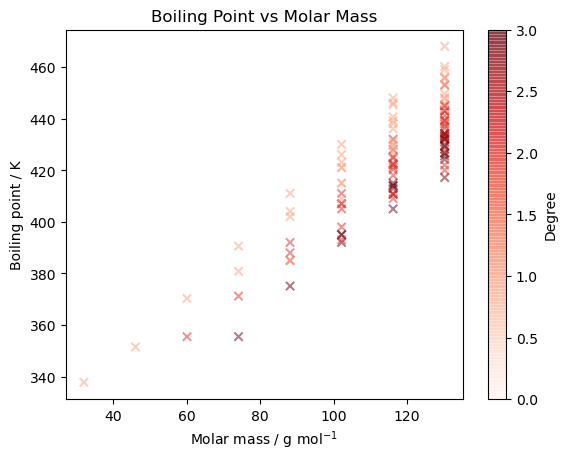

In [16]:
# A scatter plot of the boiling point of alcohol vs the molar mass.
# Transparency of crosses set to 0.5 so that overlapping crosses are visible.
plt.scatter(ROH.iloc[:,2], ROH.iloc[:,1], alpha = 0.5, c = ROH['degree'], cmap = 'Reds', marker = 'x')

# The colour of each cross indicates the degree of the alcohol.
plt.colorbar(label = 'Degree')

# Set the minimum value of the colour bar to be 0 so that primary alcohols are still visible on plot.
plt.clim(vmin = 0, vmax = 3)

plt.xlabel('Molar mass / g mol$^{-1}$')
plt.ylabel('Boiling point / K')
plt.title('Boiling Point vs Molar Mass')
plt.show()

Knowing that there are many factors influencing the boiling point of a simple alcohol, we aim to find out how significant is each factor in affecting the boiling point of a simple alcohol. Knowing the significant factors affecting the boiling point allows us to use these factors as indicators of the boiling point of a simple alcohol. Being able to make an educated guess is important as the boiling points of some alcohols are not widely available. We plan to study the factors by making use of the module scikit-learn, abbreviated as *sklearn*.

### 1.2 Scikit-learn

Scikit-learn is a machine learning library for Python. In general, machine learning works by first training an algorithim using a set of data known as the *training data*. The training data set is complete with both input and output, also called the features and the target. This allows the various parameters in the algorithim to be adjusted to match each set of features to the correct target. Once the training is done, the algorithm will be able to predict accurately the target value based on any set of feature values not from the training set. We'll illustrate this using a linear regression model as an example, the model we will also be using for our study on alcohol boiling point.

Suppose that there are three features, $x_0$, $x_1$, and $x_2$, affecting a target, $y$. In a linear regression model, the value of $y$ is the weighted sum of the features, where the coefficient of each feature is assigned to be $w_0$, $w_1$, and $w_2$ respectively, as shown in the equation below:
\begin{align}
y= w_0x_0 + w_1x_1 + w_2x_2
\tag{1}
\end{align}

For the training data set, each data is complete with the values of $x_0$, $x_1$, $x_2$, and $y$. The algorithm works with all of these data from the training set to come up with the best values for each weight by minimising the difference between the $y$ value obtained from the equation above and the actual $y$ value. After the training is complete, we can input any set of $x_0$, $x_1$, and $x_2$ values which is different from any values from the training set, and the algorithm will predict a $y$ value for us. Normally, we will also have the true $y$ values to check if the predicted $y$ values are accurate.

Once the machine learning algorithm has came up with accurate values for each weight, assuming that the ranges of feature values have the same order of magnitude, the value of the weight indicates the significance of each feature in affecting the target value. If the weight of a feature is very large, it means that any small changes to the value of that feature will give large change to the target value. This means that the feature plays a significant role in influencing the target value.

With that, we will now introduce the general flow of our project, as follows:
1) Use a fraction of the data from *ROH.csv* to train our linear regression model.  
2) Use our trained linear regression model to predict the boiling point of the remaining alcohols not used in step 1.  
3) We inspect the value of each weight to determine how much each feature influence the boiling point of alcohol.

Next, we will briefly go through every feature that is included in our study. Specifically, we will explain why we expect each feature to affect the boiling point of alcohol. The values of all these features are included in the *ROH.csv* file.

### 1.3 Features Studied

#### Molar Mass

A higher molar mass indicates that the molecule has more electrons. Molecules with more electrons experience stronger London dispersion forces, needing more energy to overcome the intermolecular forces. Hence, we expect molecules with higher molar mass to have higher boiling point. The scatter plot above supports this prediction.

#### Degree

The degree of an alcohol measures the number of carbons connected to the carbon bonded to OH (from hereon referred to as 'the OH carbon'). A primary alcohol means that the OH carbon is connected to one other carbon only. The figure below shows examples of primary, secondary, and tertiary alcohol. Methanol is considered a primary alcohol, even though the OH carbon is not connected to any other carbons.
<img src="degree_alcohol.png" width="400"/>

For alcohols of the same molecular formula, which share the same molar mass, a higher degree means that the shape of the alcohol is more spherical. Think of it as plugging out one carbon from the end, then join it to the OH carbon. Now, the chain is shorter, and the middle becomes bulkier. This reduces the surface area of the molecule, causing neighbouring molecules to have lesser surface area to exert their intermolecular forces. As a result, the London dispersion forces become weaker. Hence, we expect a higher degree alcohol to have lower boiling point, something which is once again, supported by the scatter plot above.

#### Number of Carbons in The Longest Chain

The more carbons we have in the longest chain, the longer the chain and the larger the surface area of the molecule. This gives stronger London dispersion forces, increasing the boiling point.

#### Number of Branch Chains

If there are more branch chains, the molecule becomes more spherical, decreasing the surface area. This gives weaker London dispersion forces, decreasing the boiling point.

#### Average Distance of Branch Chains from the OH Carbon

If the branch chain is located further away from the OH carbon, the molecule will look less spherical. This gives stronger London dispersion forces, increasing the boiling point. The number assigned here represents the number of carbons the branch chain is away from the OH carbon. For example, if the branch chain is connected to the carbon next to the OH carbon, it will have a distance of one unit.

One peculiarity to take note here: not all alcohols have branch chain. However, Scikit-learn requires all features to be represented numerically. In other words, having the usual *NaN* to represent non-applicable data will not work here. We cannot asign 0 as well since having 0 distance between the branch chain and the OH carbon means that the branch chain is connected to the OH carbon. To work around this, we note that a higher distance of branch chain from the OH carbon indicates that the molecule is less spherical. Hence, we assign the terminal carbon to be 'the carbon with the branch chain', i.e. the highest number possible. This reflects the fact that among all alcohols with the same molar mass, a straight chain alcohol is the least spherical one. To partially correct for this peculiarity, we let the number of carbons in this imaginary branch chain to be 0.

#### Position of OH carbon

The presence of the hydroxy group allows alcohols to form hydrogen bonds with each other. If the hydroxy group is at the end of the carbon chain, the hydroxy group is more 'exposed' to the neighbouring groups as opposed to one which is somewhere in the middle of the carbon chain. The hydroxy group somewhere in the middle is flanked by bulky alkyl groups. Hence, the hydrogen bond formed is less extensive. This weakens the intermolecular forces, decreasing the boiling point.

#### Average Number of Carbons in Branch Chains

If the branch chains are longer, the surface area of the molecule increases. This strengthens the London dispersion forces, increasing the boiling point.

## 2 Train & Test Predictions

In this section, we will train our linear regression model so that it can predict the boiling point of an alcohol based on all the features mentioned in the introduction. We will not be using all the data from *ROH.csv* for training, only a fraction of it. This will be called the training set. The remaining ones, called the test set, will be used to evaluate the effectiveness of our trained model. We do so by first predicting the boiling points based on features from the test set. We then compare the predicted values with the true values from the test set.

### 2.1 Split Dataset

Scikit-learn has a function called *train_test_split* under model_selection. We'll make use of this function to split our data into the training set and the testing set. *train_test_split* shuffles the dataset before splitting, which is important as it ensures that the training set consists of data with a wide range of feature values. 

In [22]:
# Set the boiling point of alcohols to be the target of our training model.
target = ROH.iloc[:, 1]

# Set all factors mentioned in Introduction to be the features of our training model.
features = ROH.iloc[:, 2:]

# Shuffle and split the data. The first three quarter is used for training, the last quarter is for testing.
x_train, x_test, y_train, y_test = mds.train_test_split(features, target, test_size = 0.25)

### 2.2 Build Linear Regression Model

Scikit-learn allows us to create a linear regression model by the aptly named *LinearRegression* function, under *linear_model*. We can then train our linear regression model using the *fit* function, and make predictions using the *predict* function.

In [23]:
# Create a linear regression model. 
linReg = lnm.LinearRegression()

# Train our linear regression model by fitting the x-values to the y-values.
linReg.fit(x_train, y_train)

# Predict the boiling point using our trained model.
predicted_y = linReg.predict(x_test)

### 2.3 Evaluate Our Model Visually

One way to evaluate the accuracy of our model is by visually inspecting the scatter plot of True Boiling Point vs Predicted Boiling Point. If our model is accurate, the crosses should lie close to the line of 'True Boiling Point = Predicted Boiling Point'.

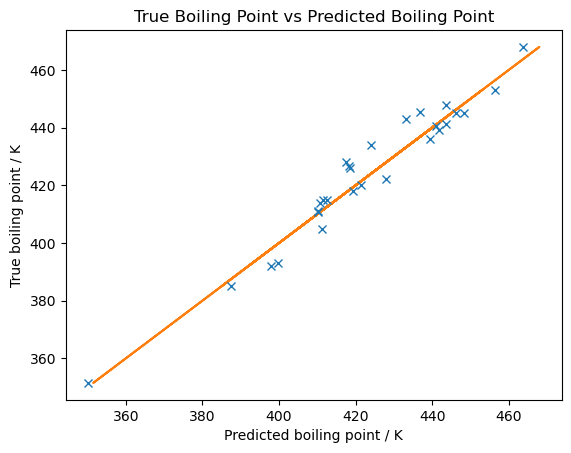

In [24]:
# A scatter plot of True Boiling Point vs Predicted Boiling Point.
plt.plot(predicted_y, y_test, 'x')

# A straight line of y=x.
plt.plot(y_test, y_test, zorder = -1)
plt.xlabel('Predicted boiling point / K')
plt.ylabel('True boiling point / K')
plt.title('True Boiling Point vs Predicted Boiling Point')
plt.show()

As we can see, our model does a pretty good job in predicting boiling points! However, this does not hold up under scientific scrutiny. The *train_test_split* function shuffles the data set randomly. This means that the training set is always different everytime we run the function, which means that the graph above will look different everytime we run the function. We can imagine that there can be occasions where our model does not predict the boiling points well. One way to address this is to use a technique called cross-validation.

### 2.4 Evaluate Our Model Using Cross-Validation

In cross-validation, instead of training the model only once, we train the model for multiple iterations. For each iteration, we use different portion of the data for training. This means that we have multiple samples of training and testing set, with all samples being different from each other.

To begin, we make use of the function *ShuffleSplit* under *model_selection* to generate the samples for cross-validation. *ShuffleSplit* shuffles the data and splits them into $n$ groups of equal size. It then uses the groups to generate $n$ samples of training and testing set. Here, we choose $n=4$, giving each group one quarter of the data set. For each iteration, *ShuffleSplit* tags one of the groups as the testing set, and the other three groups as the training set, with the testing set being a different group each time. So in four iterations, every group will have been used as the testing set.

Next, we use the *cross_val_score* function under *model_selection* to train our linear regression model using the samples generated from *ShuffleSplit*. The output of *cross_val_score* is an array of $r^2$ values. Each $r^2$ value measures the strength of the prediction of each iteration. If the value is closer to 1, the prediction is better. One way to measure the efficacy of the model is by computing the average $r^2$ value.

In [32]:
# Generate four iterations of training and testing set.
cv_generator = mds.ShuffleSplit(n_splits = 4)

# Compute the r^2 value of each iteration.
scores = mds.cross_val_score(linReg, features, target, cv = cv_generator)

# Compute the average r^2 value.
scores.mean()

0.9672840271668661

As we can see, the average $r^2$ value is very close to one. This suggests that our linear regression model is effective in prediting the boiling point of a simple alcohol based on the features taken into consideration.

## 3 Examine the Weight of Each Feature

Since we are now confident that our linear regression model is reliable, we can then use the weights of each feature to gauge its significance in affecting the boiling point. The weight values can be obtained via *coef_*.

In [37]:
# Extracting the weight of each feature from our linear regression model.
weight_feature = linReg.coef_

# Match each weight value to its corresponding feature name.
list(zip(ROH.columns[2:], weight_feature))

[('molar mass / g/mol', 1.4243795347117896),
 ('degree', -6.459280991559067),
 ('number of carbons in the longest chain', -1.877922269825345),
 ('number of branch chains', -7.935589597225997),
 ('average distance of branch chain from the OH carbon', 2.1351235654324983),
 ('position of OH carbon', -4.399457286629054),
 ('average number of carbons in branch chain', -0.051436787062975775)]

Based on the output, it may be tempting to conclude that the number of branch chains plays the most significant role in determining the boiling point of a simple alcohol. However, this conclusion is only valid if we discount the contribution due to molar mass. This is because the range of molar mass is different from the range of other features. 

To understand why the range of features matter, we use equation (1) as an example. Suppose that $x_0$ ranges from 100 to 200, with $w_0=3$. $x_0$ will contribute to the change in $y$ by 300. If $x_1$ ranges from 1 to 2, with $w_1=6$, it will contribute to the change in $y$ by 6. Thus, even though $w_1$ is larger than $w_0$, $x_0$ influences $y$ more significantly due to its larger range of values. The comparison is not fair when the features have different ranges.

To address this issue, we can scale the features to the same range. Once again, scikit-learn already has a class of functions to do that, under *preprocessing*. We'll use *MinMaxScaler*, which scales the features to between 0 and 1 linearly.

In [38]:
# Load the scaling function.
scaler_0to1 = ppc.MinMaxScaler()

# Identify the minimum and the maximum of each feature.
scaler_0to1.fit(features)

# Use the identified minimum and maximum for scaling.
scaled_features = scaler_0to1.transform(features)

From here, we proceed to train our linear regression model as before, but this time, using the scaled features instead.

In [40]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = mds.train_test_split(scaled_features, target)
linReg.fit(x_train_scaled, y_train_scaled)
weight_scaled_features = linReg.coef_
list(zip(ROH.columns[2:], weight_scaled_features))

[('molar mass / g/mol', 136.37748977064985),
 ('degree', -14.709798436142044),
 ('number of carbons in the longest chain', -5.017950079268144),
 ('number of branch chains', -21.4677200769405),
 ('average distance of branch chain from the OH carbon', 8.80021901362063),
 ('position of OH carbon', -13.215105394365793),
 ('average number of carbons in branch chain', -5.0190082451338)]

It is clear from the weight values that, unsurprisingly, the molar mass is, by far, the most important factor in determining the boiling point of simple alcohols. The signs of the weights also have physical meanings. The weight value of molar mass and average distance of the branch chain from the OH carbon are positive, indicating that these two features show positive correlation with boiling point. The other four features show negative correlation. All these agree with the conventional chemistry intuition as highlighted in the introduction.

## 4 Future Works

The algorithm used in this notebook is a very commonly used to identify the significance of a feature in affecting a target. In fact, for those who took SP2271, the Alzheimer Paper for A2 did exactly that, where the authors used linear regression model to study how normalized protein level depends on five features: Alzheimer's disease phenotype, age, sex, cardiovascular disease, and population structure. For those interested in exploring this project, you can use linear regression model to study other scientific concepts which involves dependence on multiple factors, and see if you can derive any scientific insights out of it.